# Result Compilation & Evaluation for Further Discussion

Debug - Train A test F1 values: [0.676, 0.814, 0.7269]
Debug - Train B test F1 values: [0.81, 0.842, 0.9436]


/tmp/ipython-input-637020089.py:183: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax6.set_xticklabels(labels, rotation=0, ha='center')


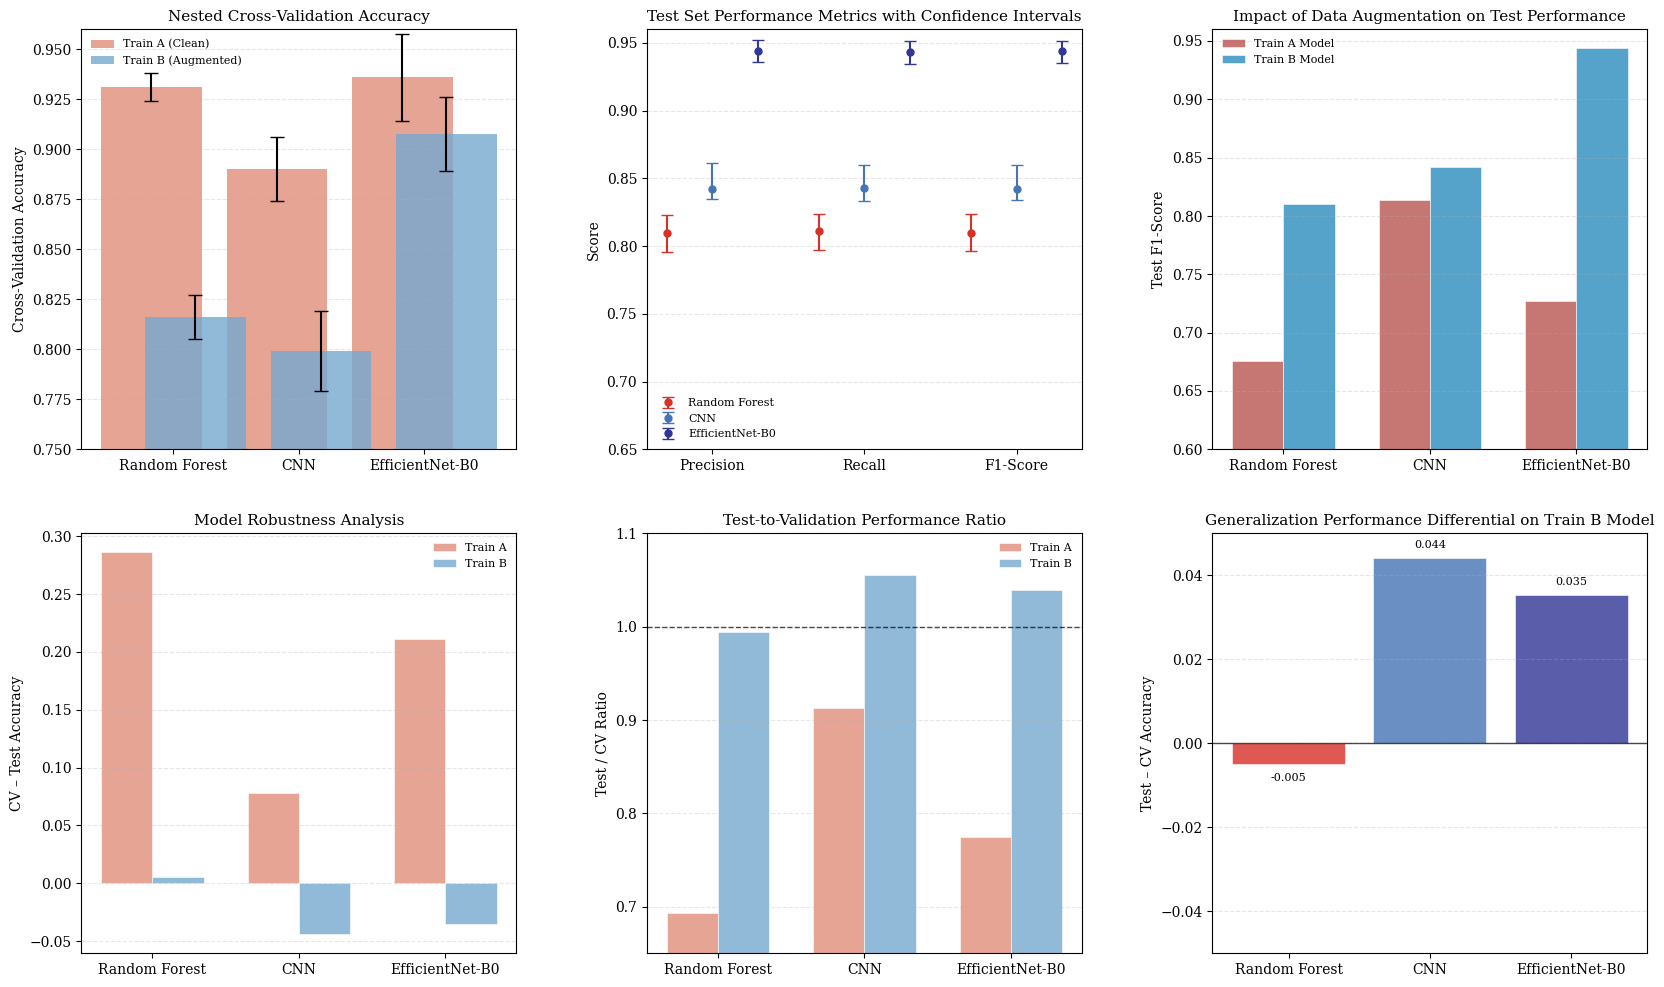

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "legend.fontsize": 8,
    "font.family": "serif",
})

class ModelResults:
    def __init__(self, name, color, cv_mean_A, cv_std_A, cv_mean_B, cv_std_B,
                 test_metrics_A, test_metrics_B, ci_A, ci_B):
        self.name = name
        self.color = color
        self.cv_mean_A = cv_mean_A
        self.cv_std_A = cv_std_A
        self.cv_mean_B = cv_mean_B
        self.cv_std_B = cv_std_B
        self.test_metrics_A = test_metrics_A
        self.test_metrics_B = test_metrics_B
        self.ci_A = ci_A
        self.ci_B = ci_B

# Model data Results
RF = ModelResults(
    "Random Forest", "#D73027",
    0.931, 0.007, 0.816, 0.011,
    dict(acc=0.645, prec=0.709, rec=0.645, f1=0.676),
    dict(acc=0.811, prec=0.810, rec=0.811, f1=0.810),
    dict(acc=(0.6277, 0.6630), prec=(0.6928, 0.7252),
         rec=(0.6295, 0.6624), f1=(0.6602, 0.6916)),
    dict(acc=(0.7970, 0.8240), prec=(0.7958, 0.8230),
         rec=(0.7968, 0.8237), f1=(0.7963, 0.8235))
)

CNN = ModelResults(
    "CNN", "#4575B4",
    0.890, 0.016, 0.799, 0.020,
    dict(acc=0.812, prec=0.816, rec=0.812, f1=0.814),
    dict(acc=0.843, prec=0.842, rec=0.843, f1=0.842),
    dict(acc=(0.7987, 0.8267), prec=(0.8019, 0.8291),
         rec=(0.7981, 0.8259), f1=(0.8003, 0.8273)),
    dict(acc=(0.8337, 0.8607), prec=(0.8348, 0.8613),
         rec=(0.8335, 0.8596), f1=(0.8340, 0.8601))
)

EffNet = ModelResults(
    "EfficientNet‑B0", "#313695",
    0.9359, 0.0216, 0.9077, 0.0185,
    dict(acc=0.725, prec=0.7288, rec=0.725, f1=0.7269),
    dict(acc=0.943, prec=0.9443, rec=0.943, f1=0.9436),
    dict(acc=(0.7080, 0.7410), prec=(0.7122, 0.7452),
         rec=(0.7084, 0.7410), f1=(0.7104, 0.7431)),
    dict(acc=(0.9343, 0.9510), prec=(0.9359, 0.9522),
         rec=(0.9346, 0.9511), f1=(0.9351, 0.9516))
)

models = [RF, CNN, EffNet]
labels = [m.name for m in models]

train_a_color = "#E08E79"
train_b_color = "#74A9CF"
train_a_test_color = "#B85450"
train_b_test_color = "#2B8CBE"

fig = plt.figure(figsize=(18, 11))
gs = fig.add_gridspec(
    2, 3,
    height_ratios=[1, 1],
    hspace=0.20,
    wspace=0.3,
    left=0.08, right=0.95, top=0.92, bottom=0.08
)
x = np.arange(len(models))
width = 0.35

# (A) Nested CV Accuracy
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(x - width/2, [m.cv_mean_A for m in models],
        yerr=[m.cv_std_A for m in models], capsize=5,
        color=train_a_color, alpha=0.8, label="Train A (Clean)")
ax1.bar(x + width/2, [m.cv_mean_B for m in models],
        yerr=[m.cv_std_B for m in models], capsize=5,
        color=train_b_color, alpha=0.8, label="Train B (Augmented)")
ax1.set_ylabel("Cross‑Validation Accuracy")
ax1.set_title("Nested Cross‑Validation Accuracy")
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=0, ha='center')
ax1.set_ylim(0.75, 0.96)
ax1.grid(axis="y", alpha=0.3, linestyle="--")
ax1.legend(frameon=False, loc='upper left')

# (B) Test Metrics (95% Confidence Intervals) - Train B
ax2 = fig.add_subplot(gs[0, 1])
metric_keys = ["prec", "rec", "f1"]
metric_labels = ["Precision", "Recall", "F1‑Score"]
x_m = np.arange(len(metric_keys))
width_m = 0.3 

for i, m in enumerate(models):
    vals = [m.test_metrics_B[k] for k in metric_keys]
    lows = [m.test_metrics_B[k] - m.ci_B[k][0] for k in metric_keys]
    highs = [m.ci_B[k][1] - m.test_metrics_B[k] for k in metric_keys]
    ax2.errorbar(x_m + (i - 1)*width_m, vals, yerr=[lows, highs],
                 fmt="o", capsize=4, markersize=5, lw=1.5,
                 color=m.color, label=m.name)

ax2.set_xticks(x_m)
ax2.set_xticklabels(metric_labels, rotation=0, ha='center')
ax2.set_ylim(0.65, 0.96)
ax2.set_ylabel("Score")
ax2.set_title("Test Set Performance Metrics with Confidence Intervals")
ax2.grid(axis="y", alpha=0.3, linestyle="--")
ax2.legend(frameon=False, loc='lower left')

# (C) Test Performance by Training Data Type
ax3 = fig.add_subplot(gs[0, 2])
trainA_test = [m.test_metrics_A["f1"] for m in models]
trainB_test = [m.test_metrics_B["f1"] for m in models]

print("Debug - Train A test F1 values:", trainA_test) # to check
print("Debug - Train B test F1 values:", trainB_test) # to check

ax3.bar(x - width/2, trainA_test, width, color=train_a_test_color, alpha=0.8,
        label="Train A Model", edgecolor='white', linewidth=0.5)
ax3.bar(x + width/2, trainB_test, width, color=train_b_test_color, alpha=0.8,
        label="Train B Model", edgecolor='white', linewidth=0.5)

ax3.set_xticks(x)
ax3.set_xticklabels(labels, rotation=0, ha='center')
ax3.set_ylabel("Test F1-Score")
ax3.set_ylim(0.6, 0.96)
ax3.set_title("Impact of Data Augmentation on Test Performance")
ax3.grid(axis="y", alpha=0.3, linestyle="--")
ax3.legend(frameon=False, loc='upper left')

# (D) Robustness Gap
ax4 = fig.add_subplot(gs[1, 0])
gap_A = [m.cv_mean_A - m.test_metrics_A["acc"] for m in models]
gap_B = [m.cv_mean_B - m.test_metrics_B["acc"] for m in models]

ax4.bar(x - width/2, gap_A, width, color=train_a_color, alpha=0.8,
        label="Train A", edgecolor='white', linewidth=0.5)
ax4.bar(x + width/2, gap_B, width, color=train_b_color, alpha=0.8,
        label="Train B", edgecolor='white', linewidth=0.5)
ax4.set_xticks(x)
ax4.set_xticklabels(labels, rotation=0, ha='center')
ax4.set_ylabel("CV – Test Accuracy")
ax4.set_title("Model Robustness Analysis")
ax4.grid(axis="y", alpha=0.3, linestyle="--")
ax4.legend(frameon=False, loc='upper right')

# (E) Generalization Efficiency
ax5 = fig.add_subplot(gs[1, 1])
ratio_A = [m.test_metrics_A["acc"] / m.cv_mean_A for m in models]
ratio_B = [m.test_metrics_B["acc"] / m.cv_mean_B for m in models]

ax5.bar(x - width/2, ratio_A, width, color=train_a_color, alpha=0.8,
        label="Train A", edgecolor='white', linewidth=0.5)
ax5.bar(x + width/2, ratio_B, width, color=train_b_color, alpha=0.8,
        label="Train B", edgecolor='white', linewidth=0.5)
ax5.axhline(1.0, color="black", lw=1, ls="--", alpha=0.7)
ax5.set_xticks(x)
ax5.set_xticklabels(labels, rotation=0, ha='center')
ax5.set_ylabel("Test / CV Ratio")
ax5.set_title("Test-to-Validation Performance Ratio")
ax5.set_ylim(0.65, 1.1)
ax5.grid(axis="y", alpha=0.3, linestyle="--")
ax5.legend(frameon=False, loc='upper right')

# (F) Generalization Gap (Train B)
ax6 = fig.add_subplot(gs[1, 2])
gap_values = [m.test_metrics_B["acc"] - m.cv_mean_B for m in models]

bars = ax6.bar([m.name for m in models], gap_values,
               color=[m.color for m in models], alpha=0.8,
               edgecolor='white', linewidth=0.5)
ax6.axhline(0, color="black", lw=1, alpha=0.7)
ax6.set_ylabel("Test – CV Accuracy")
ax6.set_title("Generalization Performance Differential on Train B Model")
ax6.set_xticklabels(labels, rotation=0, ha='center')
ax6.set_ylim(-0.05, 0.05)
ax6.grid(axis="y", alpha=0.3, linestyle="--")

for bar, val in zip(bars, gap_values):
    height = bar.get_height()
    label_y = height + 0.002 if height > 0 else height - 0.002
    ax6.text(bar.get_x() + bar.get_width()/2., label_y,
             f'{val:.3f}', ha='center',
             va='bottom' if height > 0 else 'top', fontsize=8)

plt.savefig("robustness_summary_final.pdf", bbox_inches="tight", dpi=300)